## Importing Libraries

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

## Training Image Preprocessing

In [27]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 6054 files belonging to 5 classes.


## Validation Image Preprocessing

In [28]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 2016 files belonging to 5 classes.


In [29]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

for x,y in training_set:
    print(x)
    print(y)
    break

## Buiding Model

In [30]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [6]:
model  = Sequential()

In [7]:
## Building Convolution Layer

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
#Output layer
model.add(Dense(units=5,activation='softmax'))

## Compiling Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

## Model Training


In [20]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
190/190 [==============================] - 35s 134ms/step - loss: 1.0355 - accuracy: 0.5730 - val_loss: 0.7361 - val_accuracy: 0.6806
Epoch 2/10
190/190 [==============================] - 19s 95ms/step - loss: 0.6358 - accuracy: 0.7398 - val_loss: 0.5413 - val_accuracy: 0.7723
Epoch 3/10
190/190 [==============================] - 16s 82ms/step - loss: 0.5403 - accuracy: 0.7777 - val_loss: 0.5210 - val_accuracy: 0.7867
Epoch 4/10
190/190 [==============================] - 15s 78ms/step - loss: 0.4672 - accuracy: 0.8059 - val_loss: 0.5239 - val_accuracy: 0.7877
Epoch 5/10
190/190 [==============================] - 15s 78ms/step - loss: 0.4244 - accuracy: 0.8251 - val_loss: 0.4687 - val_accuracy: 0.8036
Epoch 6/10
190/190 [==============================] - 15s 78ms/step - loss: 0.3836 - accuracy: 0.8310 - val_loss: 0.4702 - val_accuracy: 0.7956
Epoch 7/10
190/190 [==============================] - 15s 78ms/step - loss: 0.3568 - accuracy: 0.8532 - val_loss: 0.4610 - val_accuracy

## Model Evaluation

In [21]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

190/190 [==============================] - 10s 51ms/step - loss: 0.2414 - accuracy: 0.9047


In [22]:
print(train_loss,train_acc)

0.24137850105762482 0.9046911001205444


In [23]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

63/63 [==============================] - 4s 49ms/step - loss: 0.4759 - accuracy: 0.8095


In [24]:
print(val_loss,val_acc)

0.4758578836917877 0.8095238208770752


### Saving Model

In [32]:
model.save("trained_model.h5")

In [28]:
training_history.history

{'loss': [1.074048399925232,
  0.6384758949279785,
  0.5455878376960754,
  0.460794061422348,
  0.4181275963783264,
  0.3783767521381378,
  0.3542582392692566,
  0.30953195691108704,
  0.2749544084072113,
  0.26348215341567993],
 'accuracy': [0.559299647808075,
  0.733894944190979,
  0.7760158777236938,
  0.8111991882324219,
  0.825074315071106,
  0.8453914523124695,
  0.8567888736724854,
  0.8723158240318298,
  0.8860257863998413,
  0.8883382678031921],
 'val_loss': [0.7253540754318237,
  0.6047466397285461,
  0.5286741256713867,
  0.4524920582771301,
  0.4808196425437927,
  0.4891595244407654,
  0.4740101993083954,
  0.46478208899497986,
  0.45542874932289124,
  0.5238578915596008],
 'val_accuracy': [0.7048611044883728,
  0.7371031641960144,
  0.783730149269104,
  0.8015872836112976,
  0.7966269850730896,
  0.7986111044883728,
  0.7941468358039856,
  0.8125,
  0.807539701461792,
  0.7996031641960144]}

In [29]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [30]:
training_history.history['val_accuracy']

[0.7048611044883728,
 0.7371031641960144,
 0.783730149269104,
 0.8015872836112976,
 0.7966269850730896,
 0.7986111044883728,
 0.7941468358039856,
 0.8125,
 0.807539701461792,
 0.7996031641960144]

### Accuracy Visualization

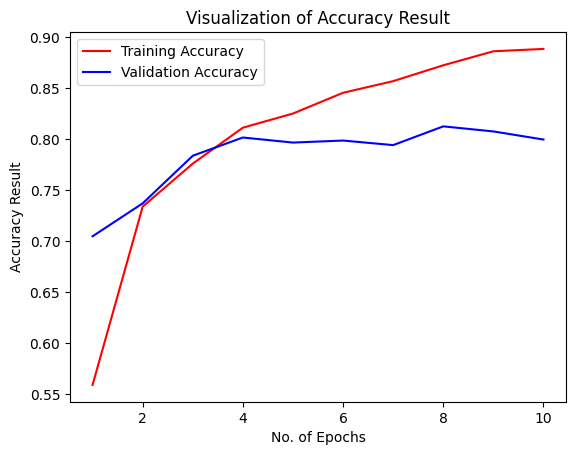

In [31]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [31]:
class_name = validation_set.class_names
class_name

['Bacterial Pneumonia',
 'Corona Virus Disease',
 'Normal',
 'Tuberculosis',
 'Viral Pneumonia']

In [33]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 2016 files belonging to 5 classes.


In [34]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

63/63 [==============================] - 4s 52ms/step


(array([[4.65530425e-01, 1.59191042e-02, 6.46139088e-05, 2.67113573e-05,
         5.18459082e-01],
        [9.04967785e-01, 3.25443223e-04, 4.32813540e-04, 6.33359105e-06,
         9.42675695e-02],
        [9.81321156e-01, 7.31941836e-05, 3.28046881e-05, 1.63918903e-05,
         1.85563341e-02],
        ...,
        [1.67530868e-02, 8.97346258e-01, 2.76325922e-03, 2.59267609e-03,
         8.05447325e-02],
        [3.67606074e-01, 1.13248556e-04, 2.73224614e-05, 4.81748339e-06,
         6.32248521e-01],
        [2.74024546e-01, 2.34055424e-05, 2.23521783e-05, 5.08575013e-08,
         7.25929677e-01]], dtype=float32),
 (2016, 5))

In [35]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [36]:
predicted_categories

<tf.Tensor: shape=(2016,), dtype=int64, numpy=array([4, 0, 0, ..., 1, 4, 4], dtype=int64)>

In [37]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(2016, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)>

In [38]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(2016,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 4], dtype=int64)>

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                      precision    recall  f1-score   support

 Bacterial Pneumonia       0.65      0.76      0.70       401
Corona Virus Disease       0.82      0.96      0.88       406
              Normal       0.92      0.85      0.88       402
        Tuberculosis       0.96      0.89      0.92       406
     Viral Pneumonia       0.67      0.54      0.60       401

            accuracy                           0.80      2016
           macro avg       0.80      0.80      0.80      2016
        weighted avg       0.80      0.80      0.80      2016



In [41]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[304,  10,   4,   2,  81],
       [  2, 388,   3,  12,   1],
       [ 18,  16, 341,   1,  26],
       [  0,  44,   0, 362,   0],
       [145,  15,  23,   1, 217]], dtype=int64)

### Confusion Matrix Visualization

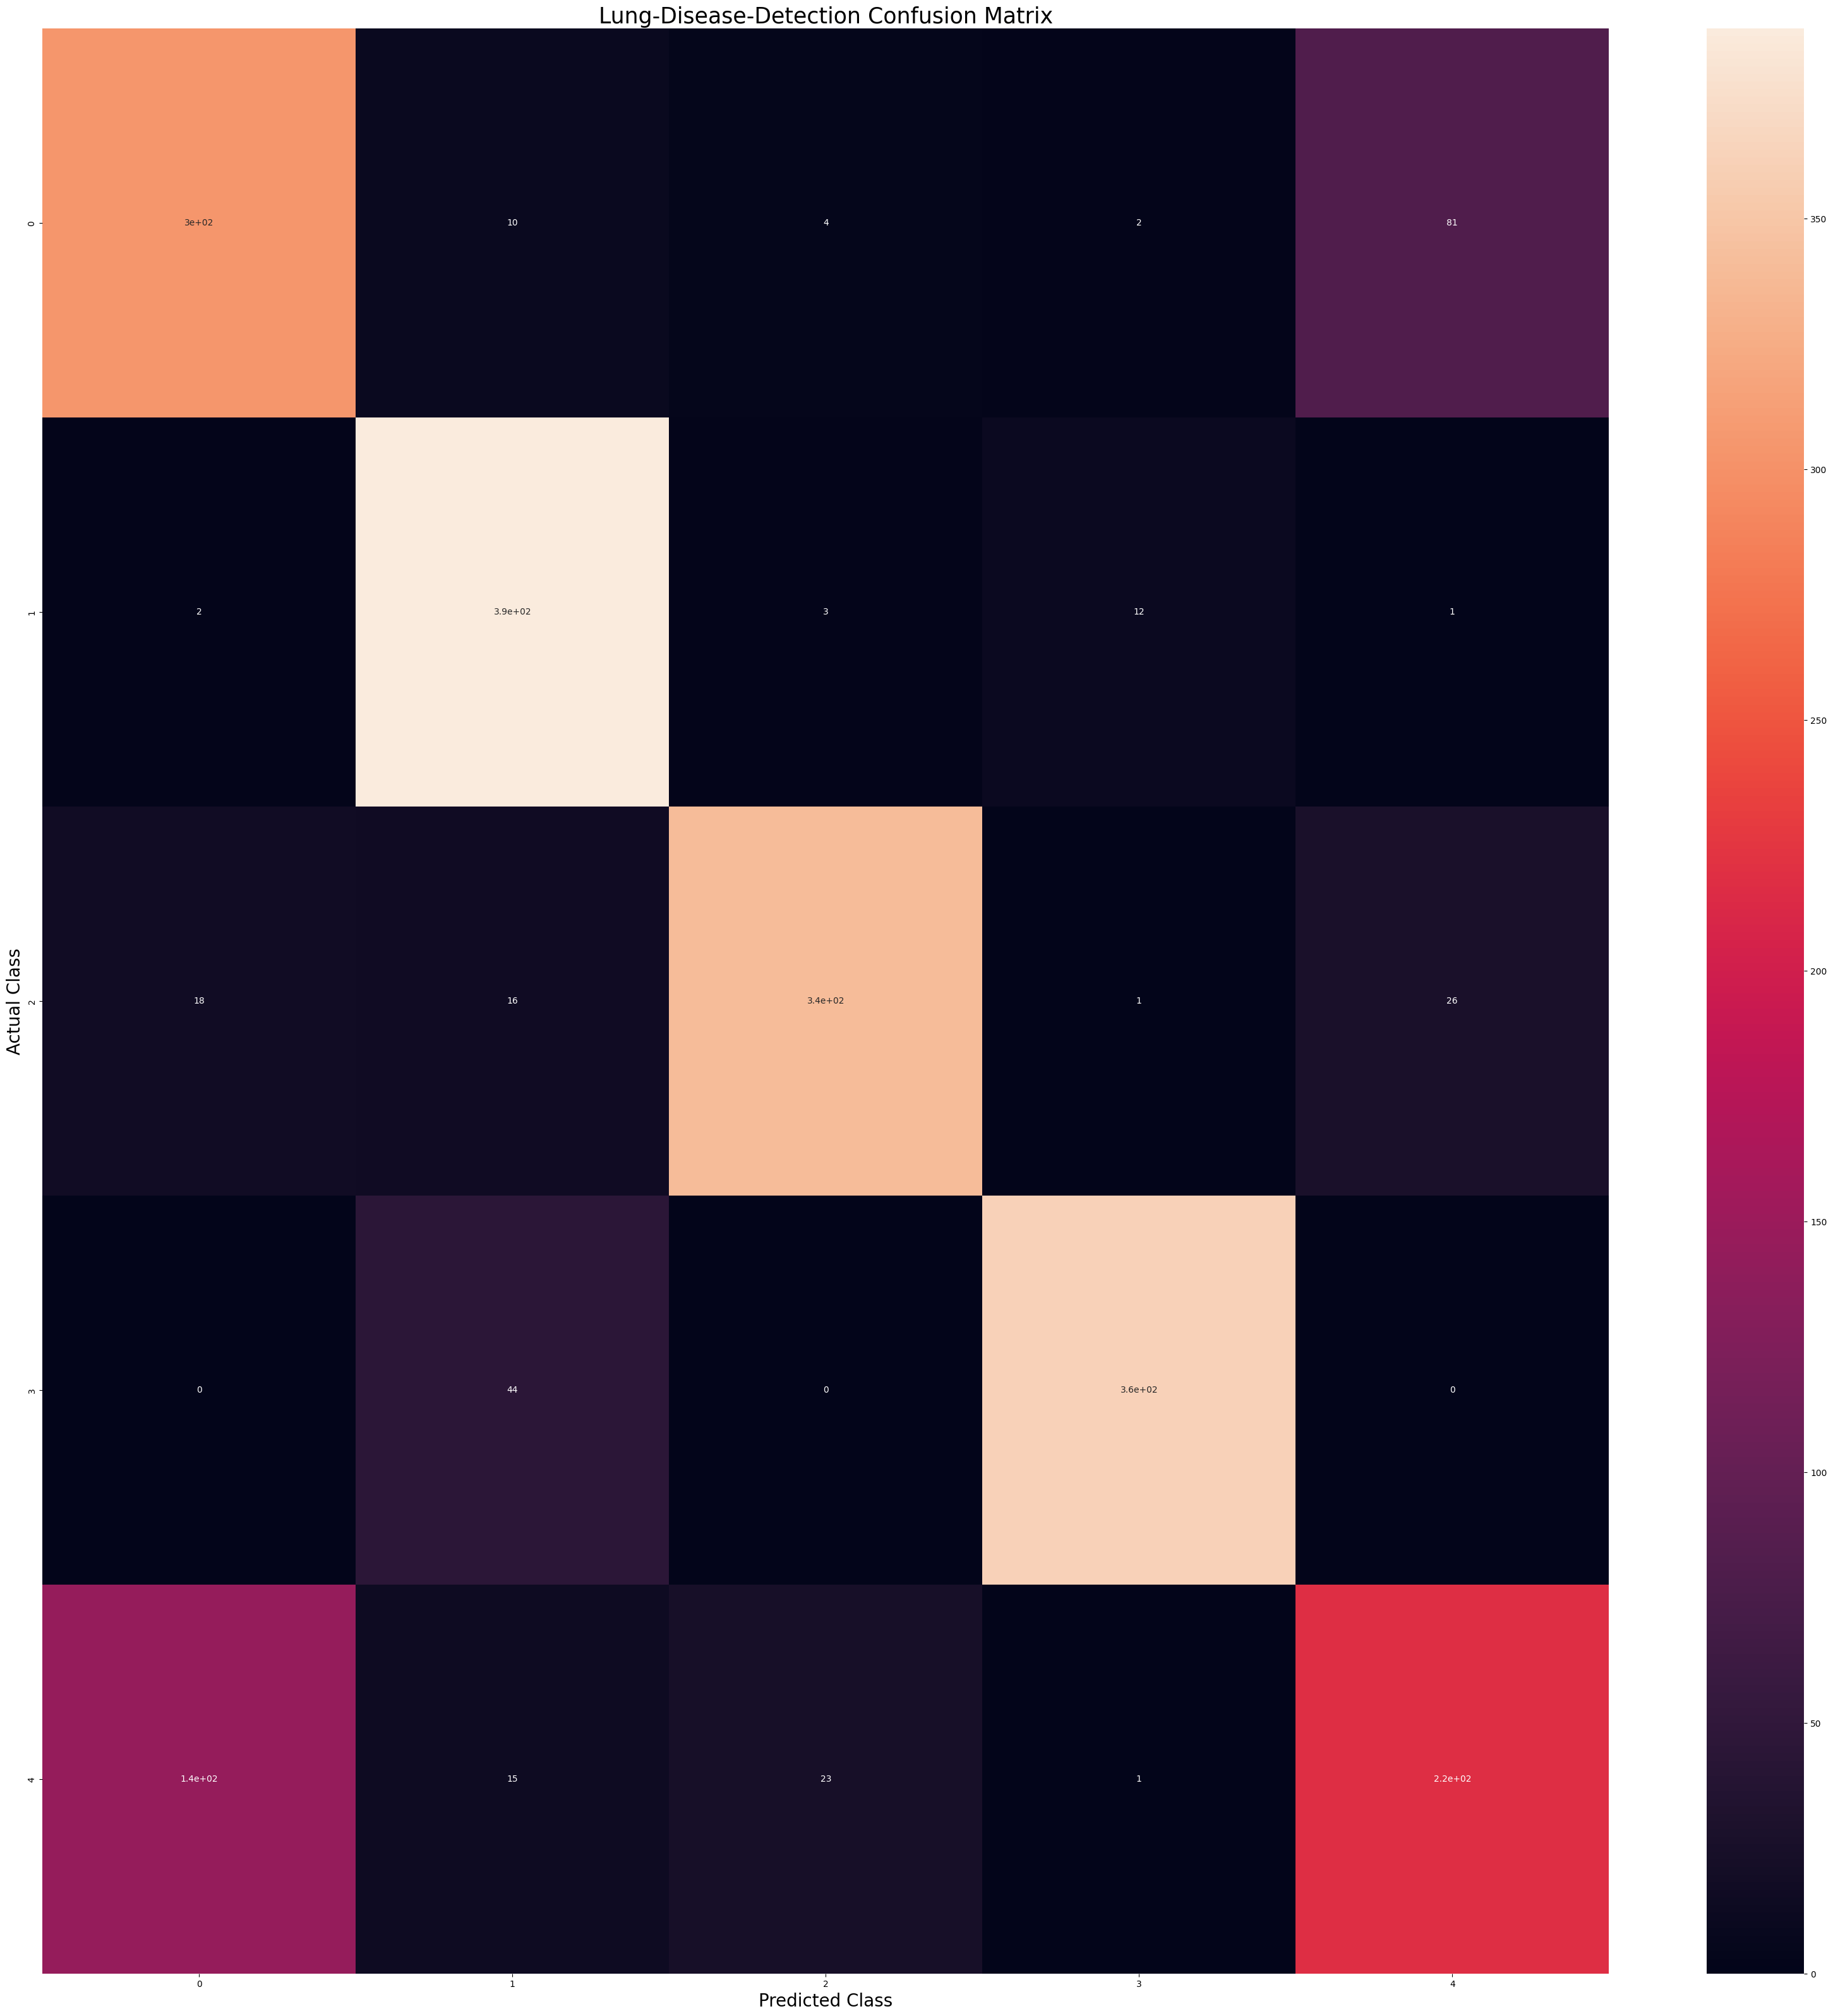

In [43]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Lung-Disease-Detection Confusion Matrix",fontsize=25)
plt.show()